<a href="https://colab.research.google.com/github/mcmathiesen/super-potato/blob/main/16_1Mathiesen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

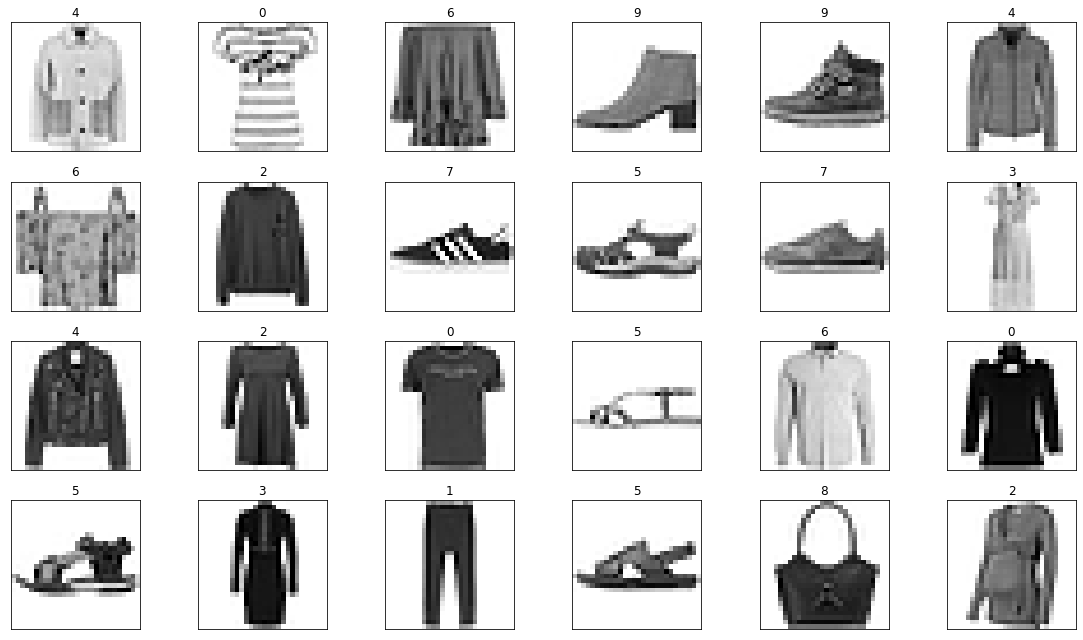

In [12]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1))  #reshaping data (width, height, channels)

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_train = X_train.astype('float32') / 255  #normalizing data

In [19]:
X_test = X_test.astype('float32') / 255

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train)  #One-hot encoding

In [22]:
y_train.shape

(60000, 10)

In [23]:
y_train[0]  #an example to show one-hot worked

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

In [26]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
from tensorflow.keras import Sequential

In [28]:
cnn = Sequential()  #creating sequential model

In [29]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [30]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))
#implementing the convolution layer
#specifying input shape (28, 28, 1) because this is the first layer

In [31]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#adding a pooling layer

In [32]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
#another convolution layer (no size necessary this time)

In [33]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#adding another pooling layer

In [34]:
cnn.add(Flatten())  #flattening the results

In [35]:
cnn.add(Dense(units=128, activation='relu'))

In [36]:
cnn.add(Dense(units=10, activation='softmax'))
#softmax converts values to classification probablilities

In [38]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

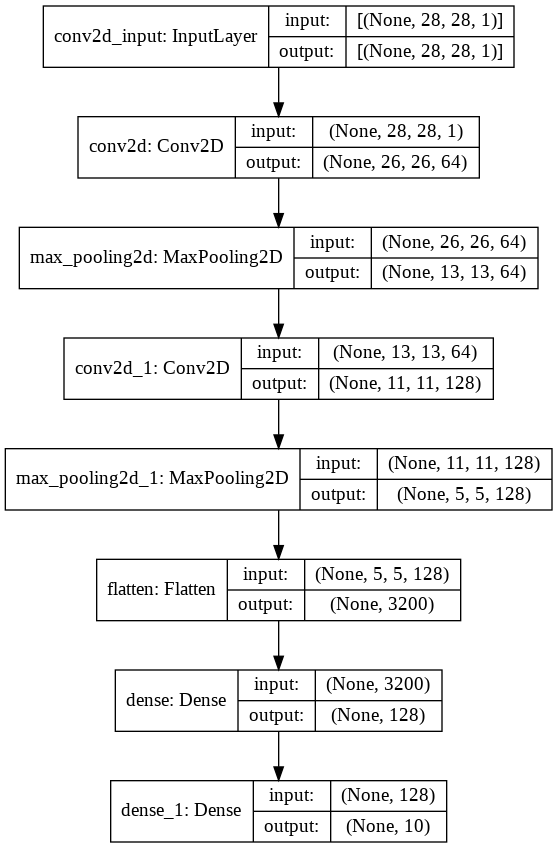

In [39]:
#visualizing model structure
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [40]:
#compiling the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [41]:
#training the model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 117s 138ms/step - loss: 0.4600 - accuracy: 0.8337 - val_loss: 0.3471 - val_accuracy: 0.8785
Epoch 2/5
844/844 [==============================] - 117s 138ms/step - loss: 0.3006 - accuracy: 0.8902 - val_loss: 0.2885 - val_accuracy: 0.8913
Epoch 3/5
844/844 [==============================] - 117s 138ms/step - loss: 0.2549 - accuracy: 0.9054 - val_loss: 0.2571 - val_accuracy: 0.9022
Epoch 4/5
844/844 [==============================] - 115s 137ms/step - loss: 0.2212 - accuracy: 0.9177 - val_loss: 0.2745 - val_accuracy: 0.9015
Epoch 5/5
844/844 [==============================] - 117s 138ms/step - loss: 0.1958 - accuracy: 0.9275 - val_loss: 0.2374 - val_accuracy: 0.9175


This was both slower and less accurate than the MNIST data set

In [42]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.2580 - accuracy: 0.9076


In [43]:
loss

0.25798094272613525

Loss was higher (0.25 vs 0.3)

In [44]:
accuracy

0.9075999855995178

Accuracy was lower (90% vs 99%)

In [45]:
predictions = cnn.predict(X_test)

In [46]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [47]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000054700%
1: 0.0000678584%
2: 0.0000019015%
3: 0.0000051544%
4: 0.0000013721%
5: 0.0430496351%
6: 0.0000033010%
7: 0.0024724683%
8: 0.0000125082%
9: 99.9543726444%


In [48]:
images = X_test.reshape((10000, 28, 28))

In [49]:
incorrect_predictions = []

In [50]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [51]:
len(incorrect_predictions)  # number of incorrect predictions

924

The above figure is roughly 10x the same figure using MINST

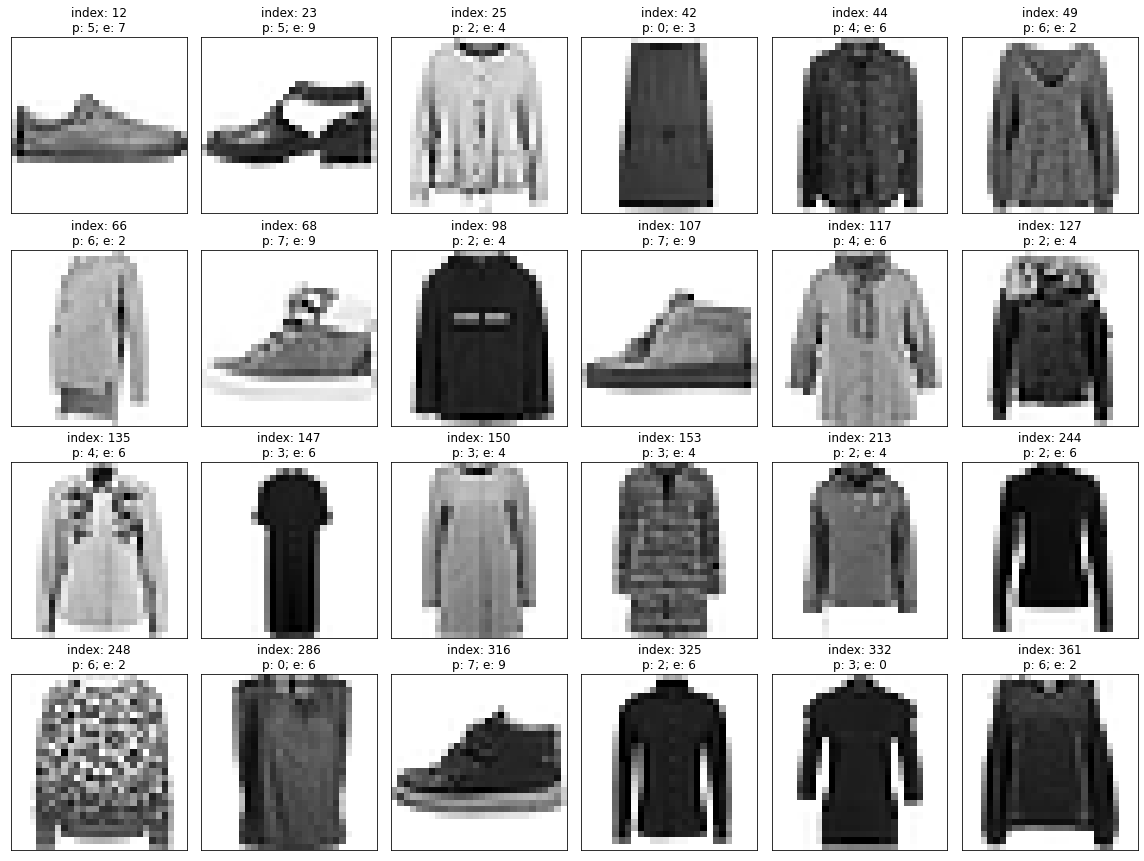

In [52]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [53]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [54]:
display_probabilities(predictions[286])

0: 54.8837006092%
1: 0.1738649211%
2: 0.9285927750%
3: 2.4021359161%
4: 0.0570774428%
5: 0.0039939518%
6: 36.1234754324%
7: 0.0009826365%
8: 5.4108425975%
9: 0.0153288187%


In [55]:
display_probabilities(predictions[325])

0: 0.2537060762%
1: 0.0000047228%
2: 94.6819186211%
3: 0.0386558095%
4: 3.7570718676%
5: 0.0000012963%
6: 1.2685248628%
7: 0.0000001117%
8: 0.0000339886%
9: 0.0000876417%


In [56]:
display_probabilities(predictions[316])

0: 0.0002299896%
1: 0.0004216668%
2: 0.0038113227%
3: 0.0034671823%
4: 0.0002293065%
5: 0.0475627283%
6: 0.0000229952%
7: 89.8385226727%
8: 0.0073428258%
9: 10.0983843207%
